In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings

import calendar

import sklearn 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score




In [103]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# There seems to be no null value in any of the column

In [105]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [106]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# By looking at data dictionary and above table , we can say 8 columns are numerical and 7 columns are categorical. Let's visualize both of them separately,
# numerical columns - instant , temp , atemp , hum , windspeed , casual , registered , cnt
# Since , 'instant' column is just the index numbers , we will drop this column.

# catergorical columns - season , yr,mnth , holiday,weekday , workingday , weathersit 

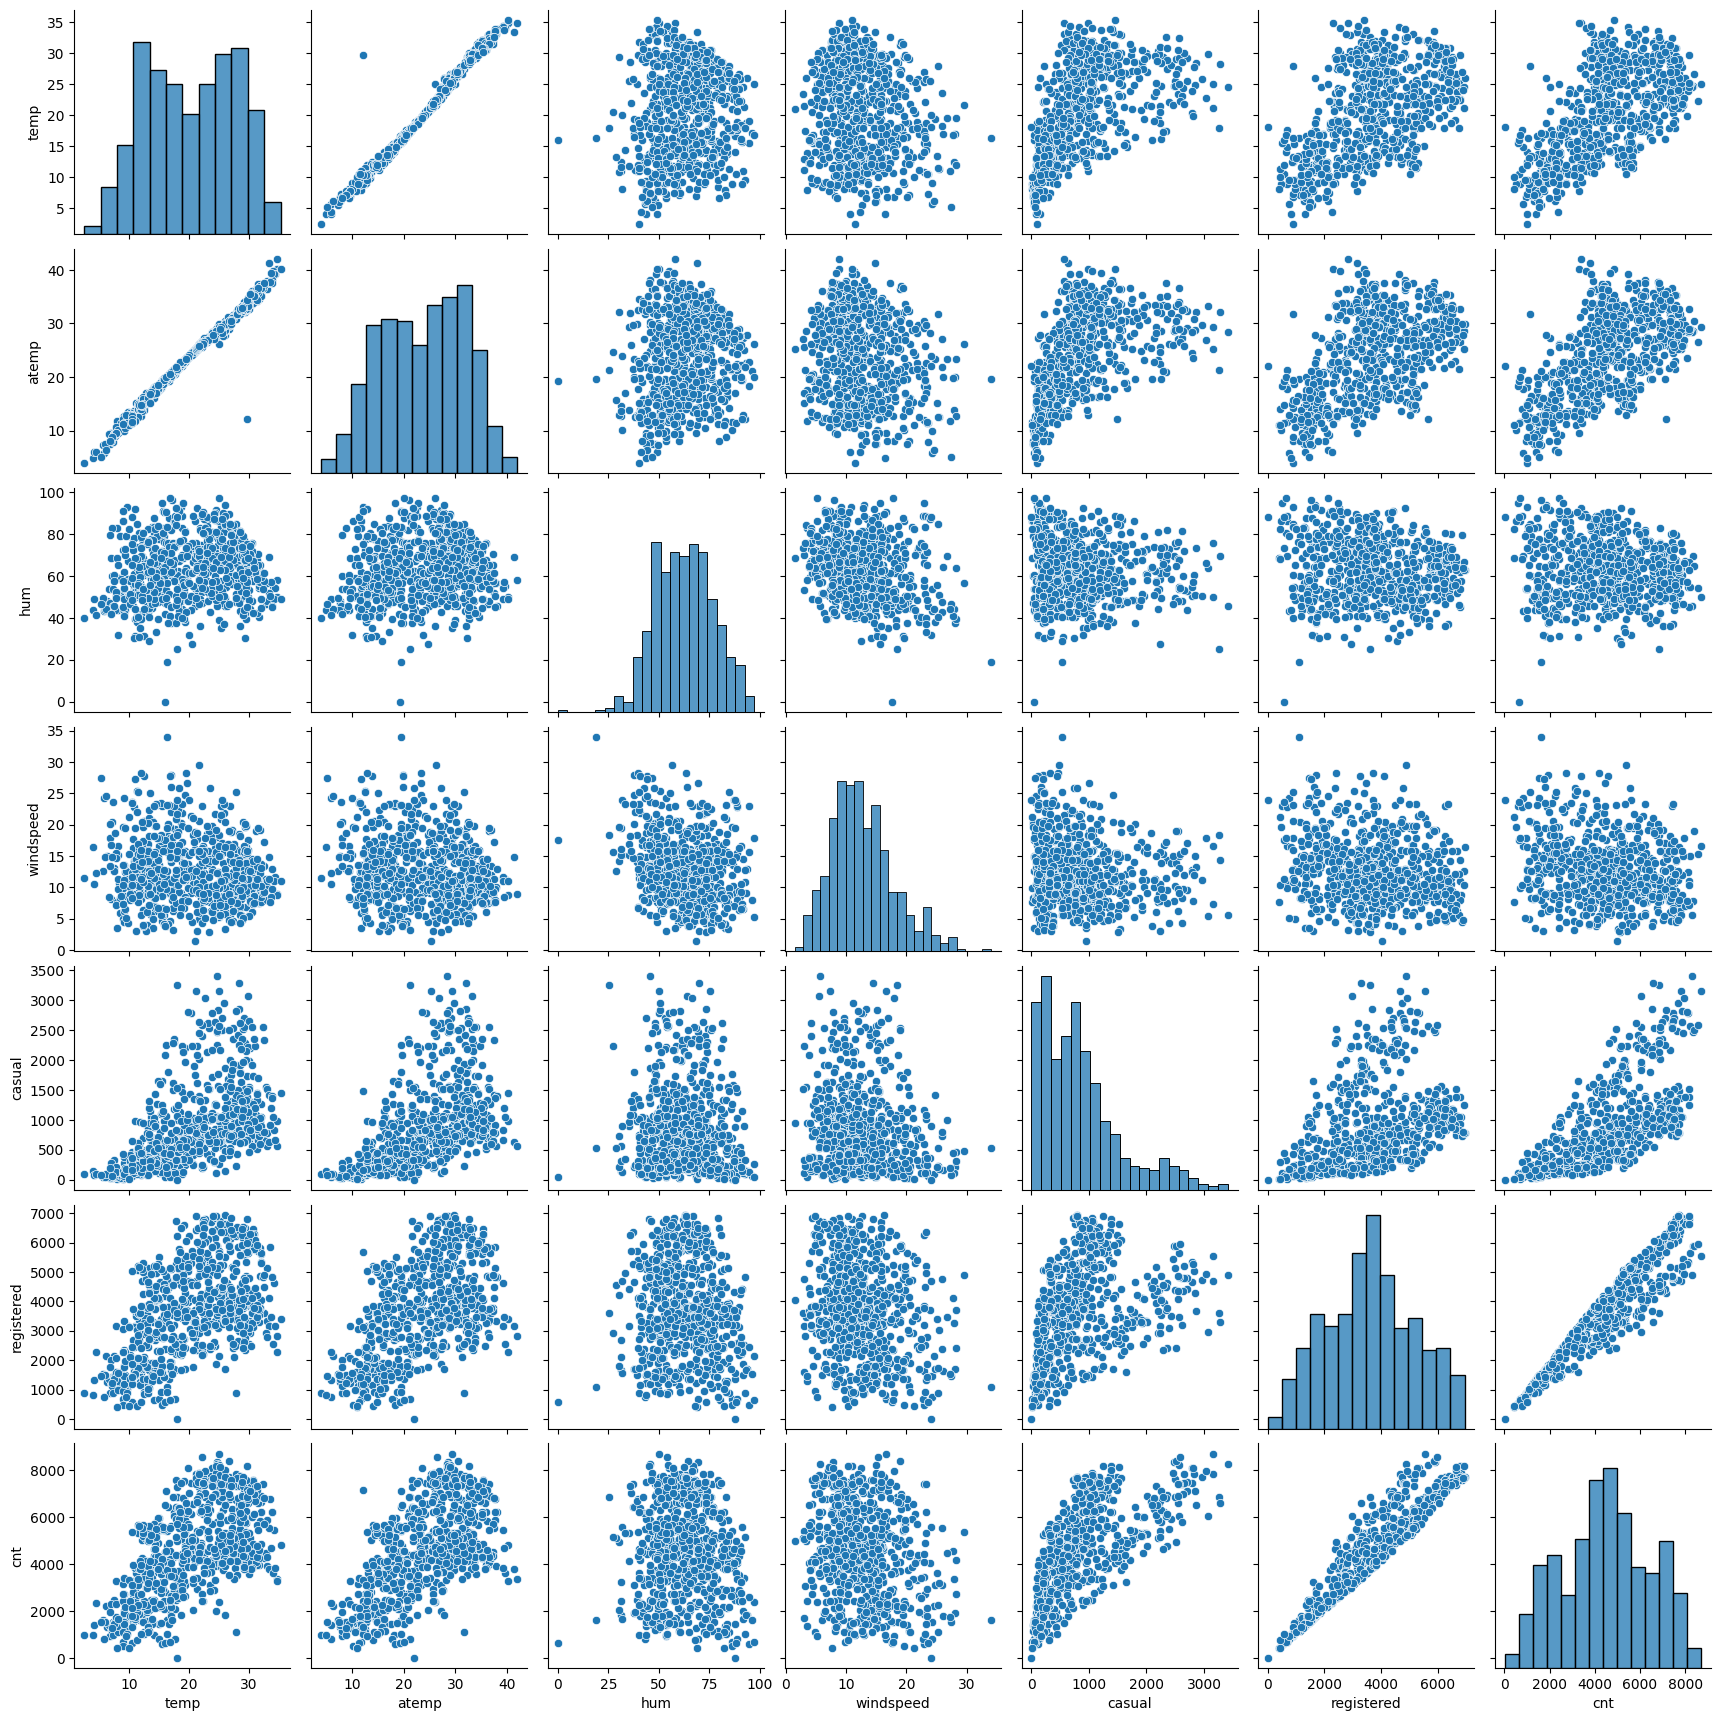

In [107]:
#visualizing the numerical variables
num_var = ['temp','atemp','hum','windspeed','casual','registered','cnt']

sns.pairplot(data=df,vars=num_var)

# By observing above graphs , we can see the 'cnt' column is having some co-relation with 'atemp' and 'temp' column

# Now , lets visualize categorical variables

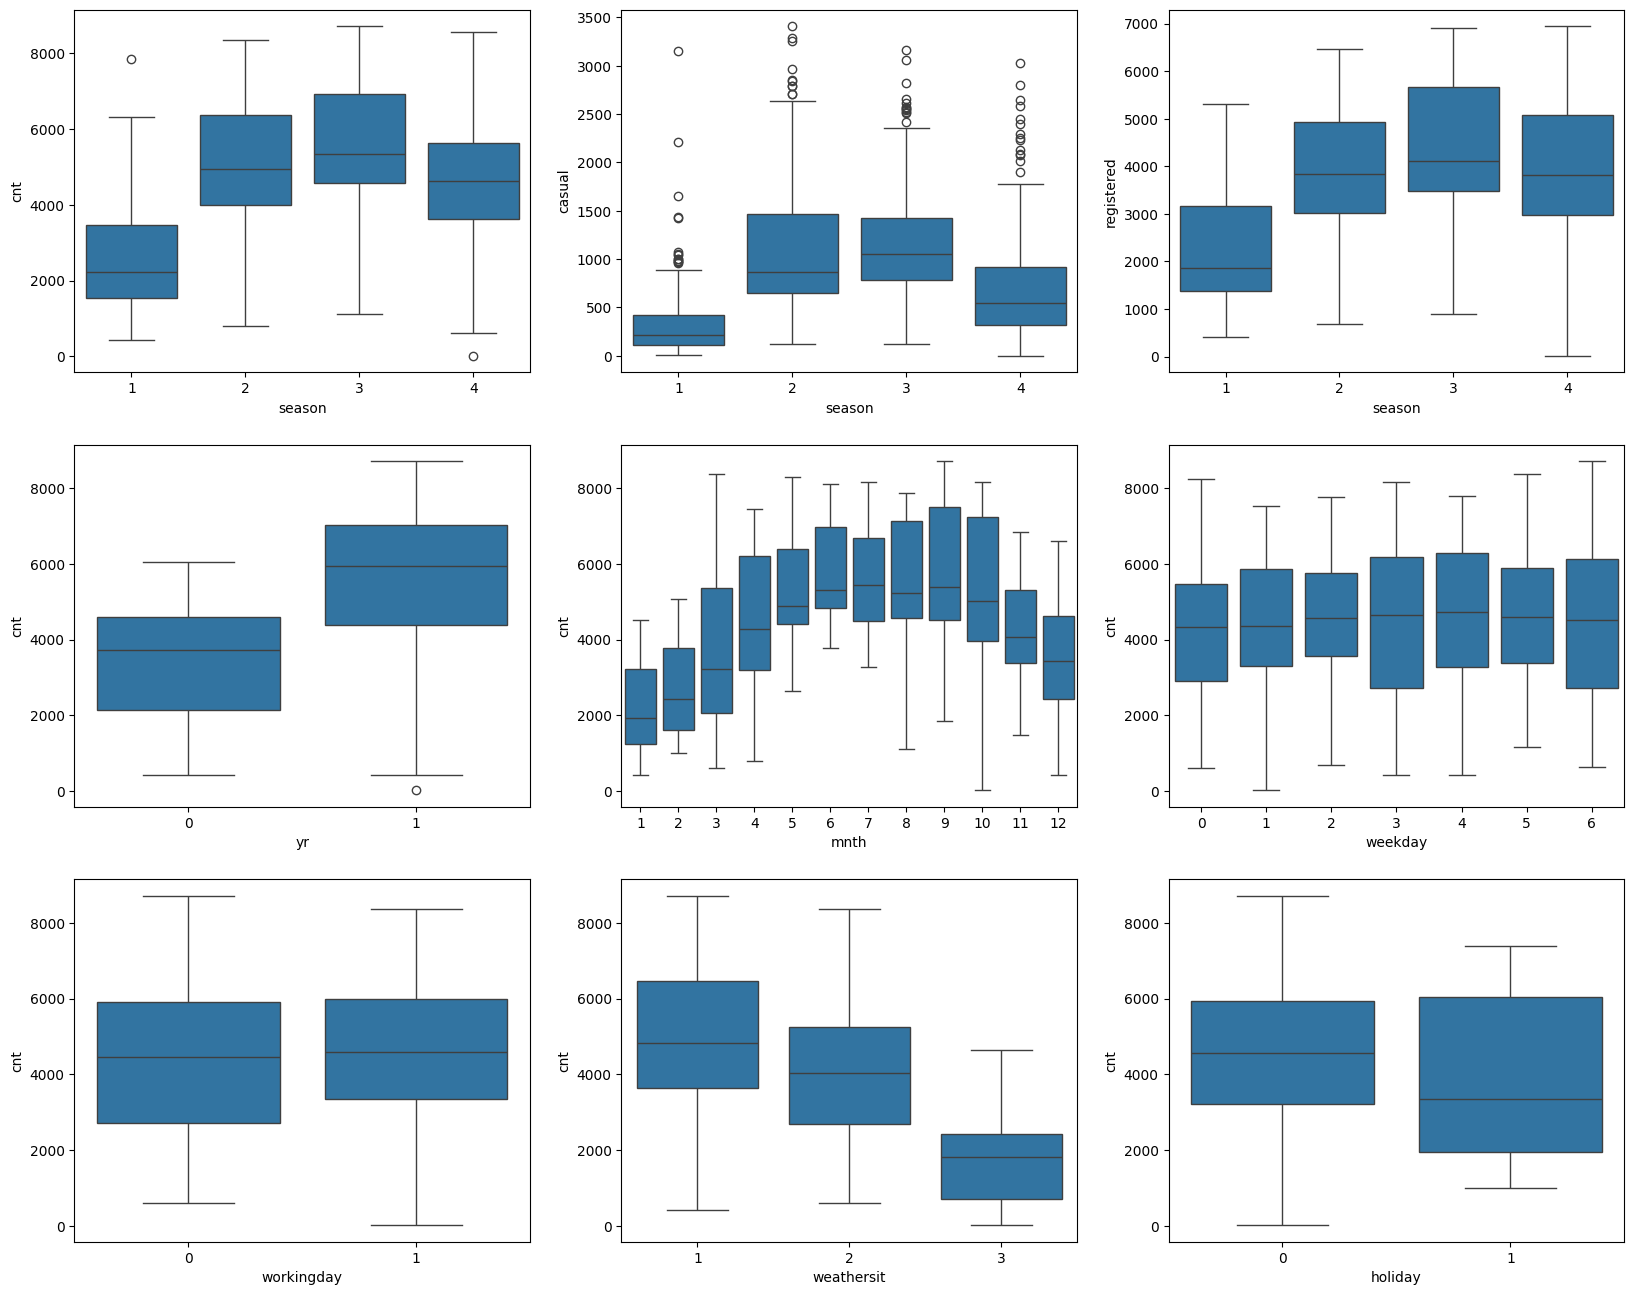

In [108]:
plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='season',y='casual',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='season',y='registered',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(3,3,9)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.show()

## Demands seems to be same throughtout the weekdays

## Weathersit category - 1 has higher median compared to others

## season 2 & 3 have higher median compared to others

### Lets map the categorical variable before creating dummy variables

In [109]:
#mapping the 'season' column first

df['season'] = df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [110]:
# mapping the 'mnth' column next

df['mnth'] = df['mnth'].apply(lambda x : calendar.month_name[x] )

In [111]:
# mapping 'weathersit' column next
df['weathersit'] = df['weathersit'].map({1:'clear',2:'mist_cloudy',3:'light_rain',4:'heavy_rain'})

In [112]:
# mapping weekday column next

df['weekday'] = df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [113]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Now , lets create dummy variables for categorical columns

In [114]:
dummy_columns = ['season','mnth','weathersit','weekday']

In [115]:
dummy_columns = pd.get_dummies(df[dummy_columns],drop_first=True,dtype=int)

In [116]:
dummy_columns

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
df = pd.concat([df,dummy_columns],axis=1)


In [118]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,01-01-2018,Spring,0,January,0,Saturday,0,mist_cloudy,14.110847,...,0,0,0,1,0,1,0,0,0,0
1,2,02-01-2018,Spring,0,January,0,Sunday,0,mist_cloudy,14.902598,...,0,0,0,1,0,0,1,0,0,0
2,3,03-01-2018,Spring,0,January,0,Monday,1,clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 730 non-null    int64  
 1   dteday                  730 non-null    object 
 2   season                  730 non-null    object 
 3   yr                      730 non-null    int64  
 4   mnth                    730 non-null    object 
 5   holiday                 730 non-null    int64  
 6   weekday                 730 non-null    object 
 7   workingday              730 non-null    int64  
 8   weathersit              730 non-null    object 
 9   temp                    730 non-null    float64
 10  atemp                   730 non-null    float64
 11  hum                     730 non-null    float64
 12  windspeed               730 non-null    float64
 13  casual                  730 non-null    int64  
 14  registered              730 non-null    in

## Since we have created dummy variables we can drop those columns

## Also , lets drop 'instant' column , 'dteday' , 'casual'column and 'registered' column also

In [120]:
df.drop(columns=['instant','dteday','season','mnth','weekday','weathersit','casual','registered'],axis=1,inplace=True)


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_Spring           730 non-null    int32  
 9   season_Summer           730 non-null    int32  
 10  season_Winter           730 non-null    int32  
 11  mnth_August             730 non-null    int32  
 12  mnth_December           730 non-null    int32  
 13  mnth_February           730 non-null    int32  
 14  mnth_January            730 non-null    in

# Now, our dataset is ready for model building

# Let's split the dataset into train and test data in 80:20 ratio

In [122]:
df_train , df_test =train_test_split(df,train_size=0.8,random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


In [123]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.028767,0.336986,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.167266,0.473004,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Now , we need to rescale the numerical columns in the train dataset

In [124]:
num_col = ['temp','atemp','hum','windspeed','cnt']

In [125]:
scaler = MinMaxScaler()

df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,0,0,0,1,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,1,0,0,0,0,0,0,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,0,0,1,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,1,0,0,0,0,0,0
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,0,0,1,0,0,0


In [126]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,...,0.092466,0.080479,0.027397,0.342466,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110
std,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,...,0.289931,0.272267,0.163378,0.474941,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


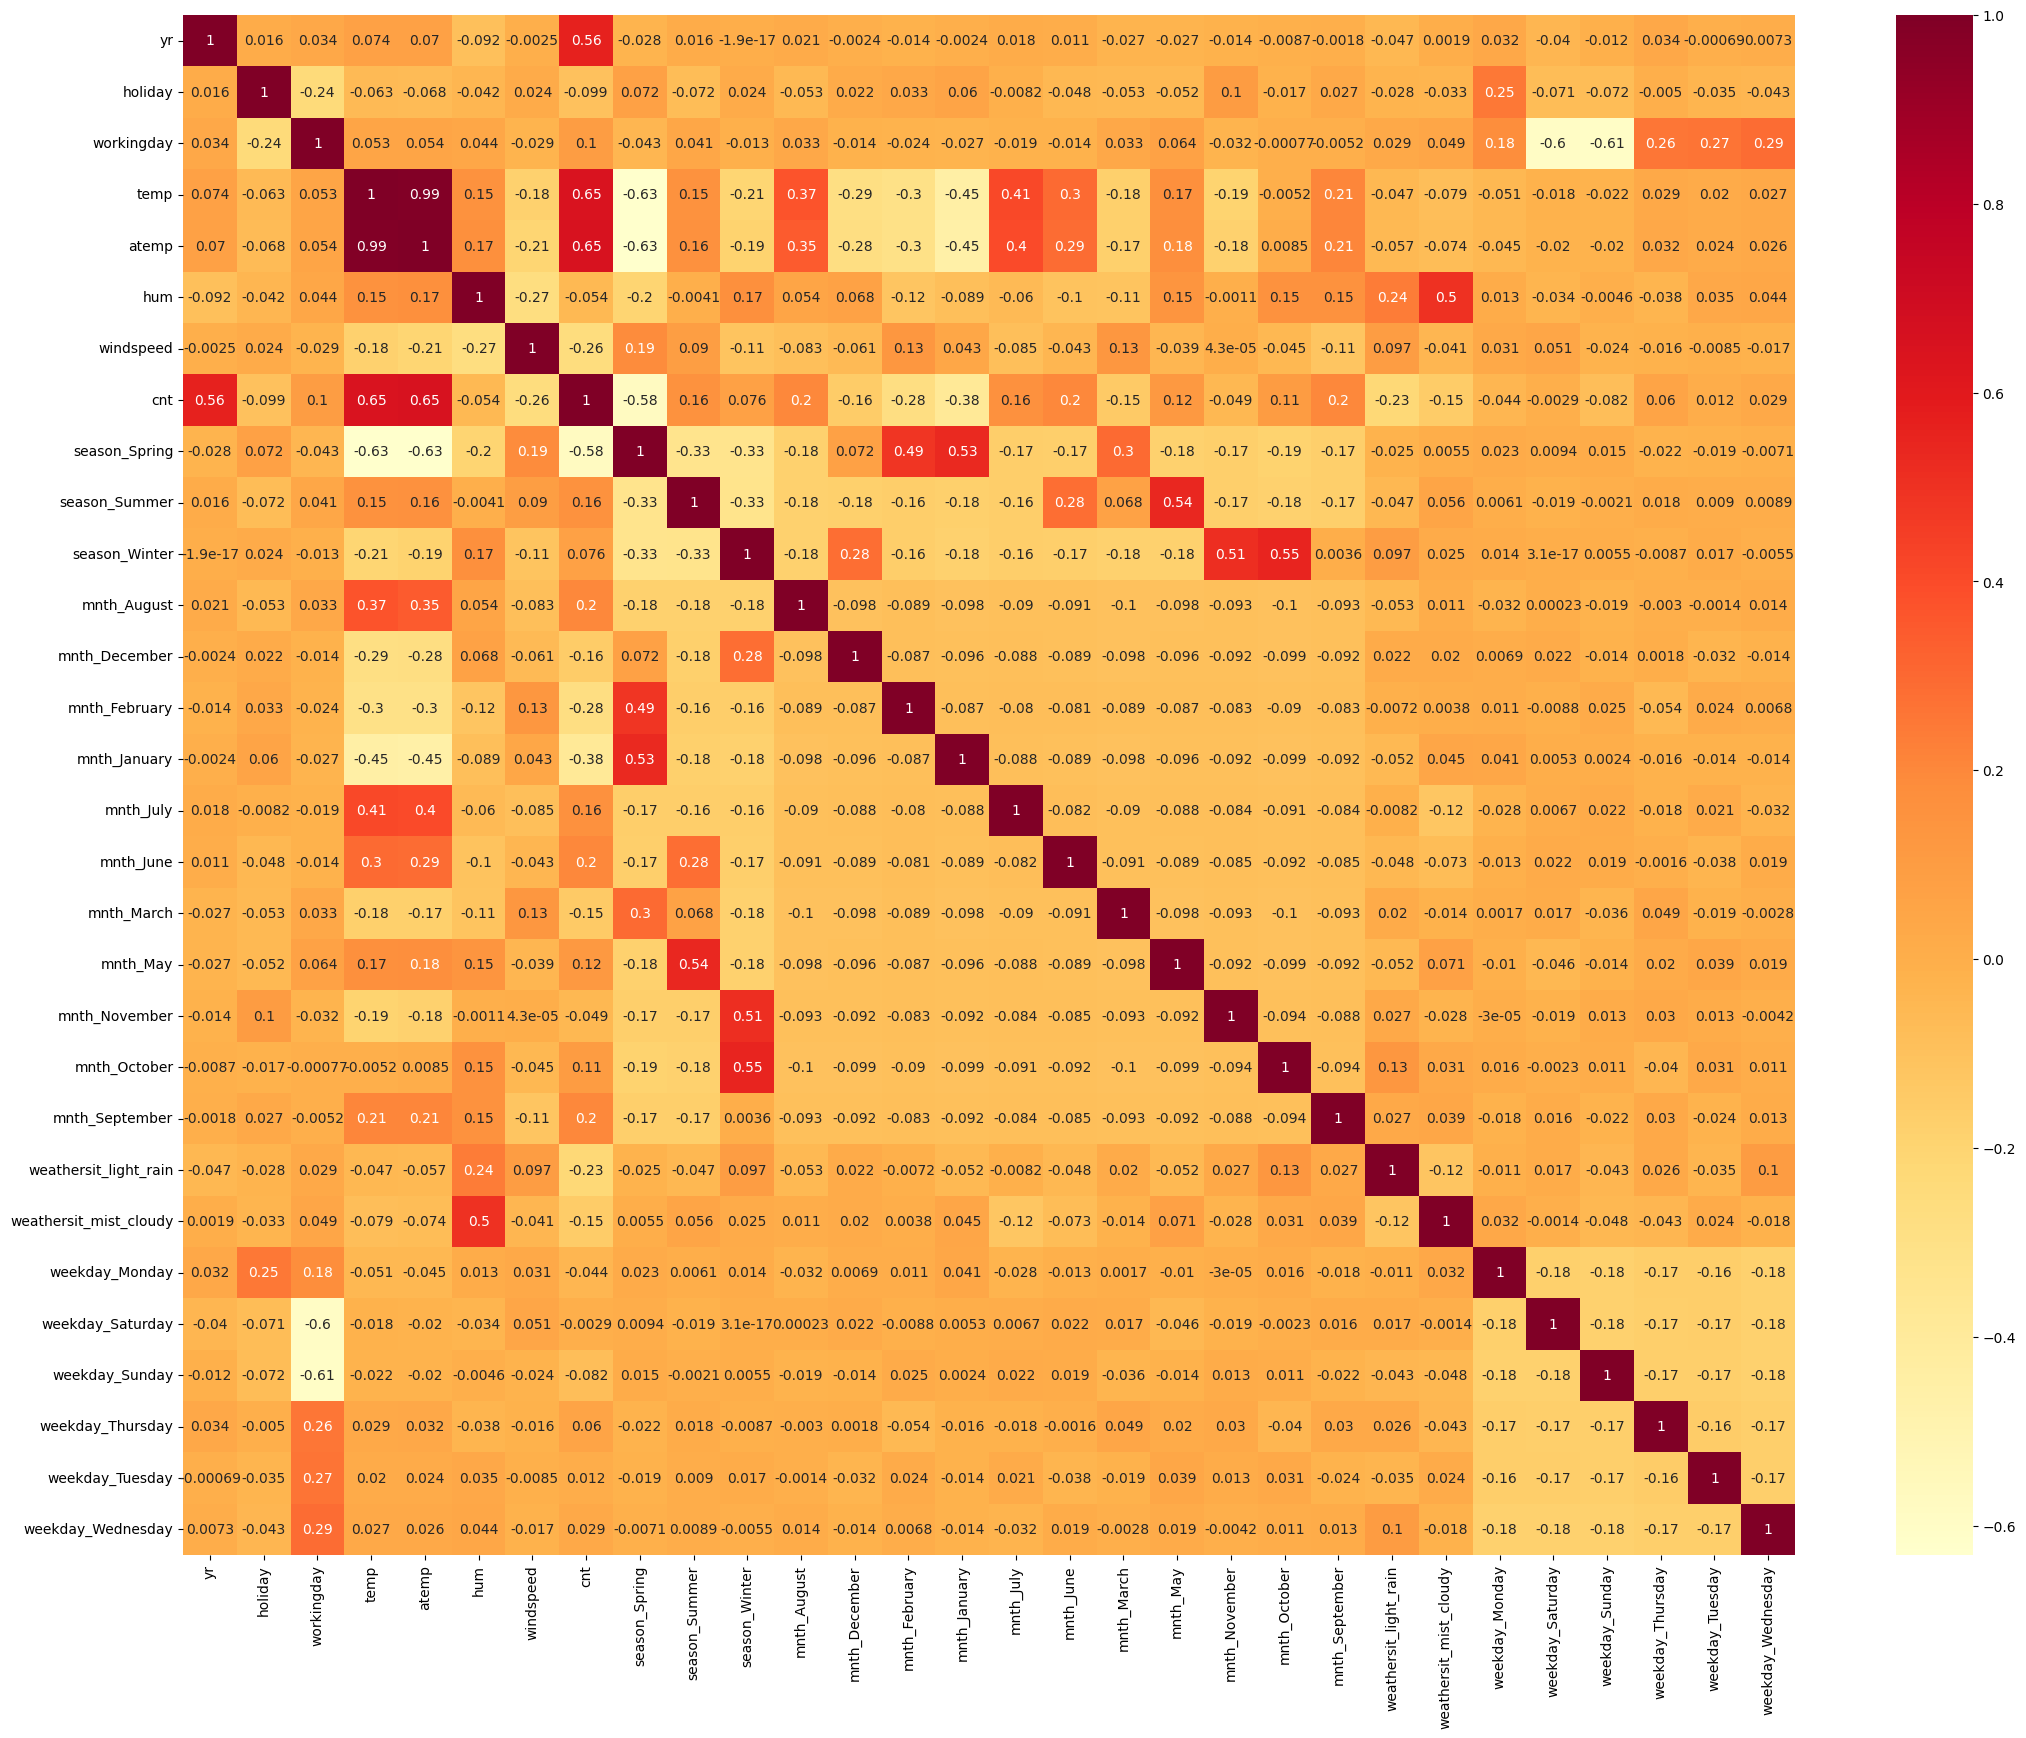

In [127]:
plt.figure(figsize=(26,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlOrRd")
plt.show()


# Now , lets load the data into y_train and X_train variable

In [128]:
y_train = df_train.pop('cnt')
X_train = df_train 

## Since , we have many variable , let's use RFE method to reduce the variables

In [129]:
# Run RFE to limit the variables to 10

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm,n_features_to_select= 10)
rfe = rfe.fit(X_train,y_train)

In [130]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 8),
 ('season_Winter', True, 1),
 ('mnth_August', False, 15),
 ('mnth_December', False, 4),
 ('mnth_February', False, 9),
 ('mnth_January', False, 5),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_March', False, 20),
 ('mnth_May', False, 14),
 ('mnth_November', False, 3),
 ('mnth_October', False, 17),
 ('mnth_September', False, 7),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist_cloudy', False, 2),
 ('weekday_Monday', False, 12),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 11),
 ('weekday_Thursday', False, 18),
 ('weekday_Tuesday', False, 13),
 ('weekday_Wednesday', False, 19)]

In [131]:
col = X_train.columns[rfe.support_]


In [132]:
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_July', 'weathersit_light_rain',
       'weekday_Saturday'],
      dtype='object')

# RFE model has filtered 10 variables. Let's make the model using these 10 variables

In [133]:
X_train_rfe = X_train[col]

In [134]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [135]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [136]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     287.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          8.38e-216
Time:                        22:24:08   Log-Likelihood:                 565.96
No. Observations:                 584   AIC:                            -1110.
Df Residuals:                     573   BIC:                            -1062.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3199      0.030     10.553      0.000       0.260       0.379
yr                        0.2236      0.008     28.811      0.000       0.208       0.239
workingday                0.0539      0.010      5.286      0.000       0.034       0.074
temp                      0.5399      0.029     18.754      0.000       0.483       0.596
hum                      -0.2609      0.030     -8.751      0.000      -0.319      -0.202
windspeed                -0.1956      0.025     -7.971      0.000      -0.244      -0.147
season_Spring            -0.1078      0.014     -7.500      0.000      -0.136      -0.080
season_Winter             0.0668      0.012      5.740      0.000       0.044       0.090
mnth_July                -0.0894      0.016     -5.492      0.000      -0.121      -0.057
weathersit_light_rain    -0.2044      0.025     -8.256      0.000      -0.253      -0.156
weekday_Saturday          0.0637      0.013      4.750      0.000       0.037       0.090
==============================================================================
Omnibus:                       74.770   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.807
Skew:                          -0.717   Prob(JB):                     1.21e-35
Kurtosis:                       5.134   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,features,VIF
3,hum,16.11
2,temp,13.54
1,workingday,4.43
4,windspeed,4.17
5,season_Spring,2.53
0,yr,2.06
6,season_Winter,1.95
9,weekday_Saturday,1.76
7,mnth_July,1.36
8,weathersit_light_rain,1.10


In [ ]:
# since 'hum' column has high VIF , lets drop it and build the model again

In [138]:
X = X_train[col].drop('hum',axis=1)

In [139]:
X_train_rfe = X

In [140]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     274.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.79e-201
Time:                        22:24:18   Log-Likelihood:                 529.33
No. Observations:                 584   AIC:                            -1039.
Df Residuals:                     574   BIC:                            -995.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1526      0.025      6.098      0.000       0.103       0.202
yr                        0.2309      0.008     28.116      0.000       0.215       0.247
workingday                0.0532      0.011      4.909      0.000       0.032       0.075
temp                      0.5022      0.030     16.585      0.000       0.443       0.562
windspeed                -0.1393      0.025     -5.529      0.000      -0.189      -0.090
season_Spring            -0.1091      0.015     -7.132      0.000      -0.139      -0.079
season_Winter             0.0545      0.012      4.436      0.000       0.030       0.079
mnth_July                -0.0689      0.017     -4.017      0.000      -0.103      -0.035
weathersit_light_rain    -0.2632      0.025    -10.388      0.000      -0.313      -0.213
weekday_Saturday          0.0657      0.014      4.609      0.000       0.038       0.094
==============================================================================
Omnibus:                       78.816   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.104
Skew:                          -0.776   Prob(JB):                     4.66e-35
Kurtosis:                       5.022   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,features,VIF
2,temp,5.89
1,workingday,4.21
3,windspeed,4.16
0,yr,2.06
4,season_Spring,1.82
8,weekday_Saturday,1.73
5,season_Winter,1.44
6,mnth_July,1.30
7,weathersit_light_rain,1.06


# since , VIF for temp variable is high , lets drop it too

In [142]:
X1 = X_train[col].drop(['hum','temp'],axis=1)

In [143]:
X_train_rfe = X1
X_train_rfe = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     185.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.30e-154
Time:                        22:24:25   Log-Likelihood:                 415.01
No. Observations:                 584   AIC:                            -812.0
Df Residuals:                     575   BIC:                            -772.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4960      0.017     29.061      0.000       0.462       0.530
yr                        0.2420      0.010     24.333      0.000       0.222       0.262
workingday                0.0582      0.013      4.416      0.000       0.032       0.084
windspeed                -0.1877      0.030     -6.175      0.000      -0.247      -0.128
season_Spring            -0.2950      0.013    -23.343      0.000      -0.320      -0.270
season_Winter            -0.0547      0.013     -4.338      0.000      -0.080      -0.030
mnth_July                 0.0245      0.020      1.247      0.213      -0.014       0.063
weathersit_light_rain    -0.2729      0.031     -8.864      0.000      -0.333      -0.212
weekday_Saturday          0.0674      0.017      3.890      0.000       0.033       0.101
==============================================================================
Omnibus:                       45.937   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.463
Skew:                          -0.569   Prob(JB):                     5.00e-16
Kurtosis:                       4.265   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
vif = pd.DataFrame()
vif['features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,features,VIF
2,windspeed,3.42
1,workingday,2.89
0,yr,1.89
3,season_Spring,1.54
7,weekday_Saturday,1.46
4,season_Winter,1.43
5,mnth_July,1.12
6,weathersit_light_rain,1.05


# since mnth_July column has high p value , lets drop that too

In [145]:
X2 = X_train[col].drop(['hum','temp','mnth_July'],axis=1)

X_train_rfe = X2
X_train_rfe = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     212.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          7.61e-155
Time:                        22:24:30   Log-Likelihood:                 414.22
No. Observations:                 584   AIC:                            -812.4
Df Residuals:                     576   BIC:                            -777.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5009      0.017     30.144      0.000       0.468       0.534
yr                        0.2422      0.010     24.341      0.000       0.223       0.262
workingday                0.0576      0.013      4.372      0.000       0.032       0.083
windspeed                -0.1905      0.030     -6.278      0.000      -0.250      -0.131
season_Spring            -0.2986      0.012    -24.238      0.000      -0.323      -0.274
season_Winter            -0.0585      0.012     -4.781      0.000      -0.083      -0.034
weathersit_light_rain    -0.2721      0.031     -8.836      0.000      -0.333      -0.212
weekday_Saturday          0.0671      0.017      3.874      0.000       0.033       0.101
==============================================================================
Omnibus:                       47.667   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.532
Skew:                          -0.584   Prob(JB):                     1.08e-16
Kurtosis:                       4.287   Cond. No.                         9.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
vif = pd.DataFrame()
vif['features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,features,VIF
2,windspeed,3.41
1,workingday,2.83
0,yr,1.87
3,season_Spring,1.49
6,weekday_Saturday,1.44
4,season_Winter,1.39
5,weathersit_light_rain,1.05


# Since , VIF and p value are within acceptable range , we can take lm4 as our final model to make predictions.

In [147]:
# Now , lets do residual analysis
y_train_pred = lm4.predict(X_train_rfe)

<Axes: ylabel='Count'>

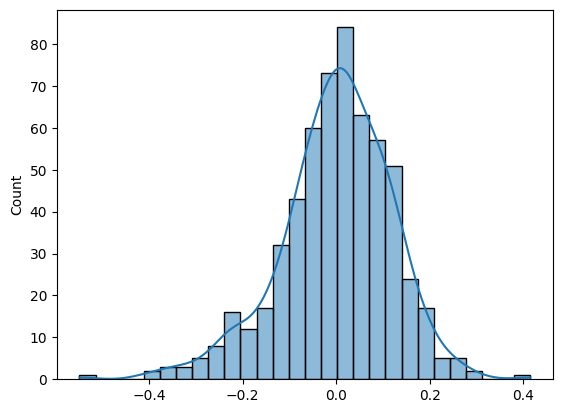

In [148]:
res = y_train - y_train_pred
sns.histplot(res,kde=True)

# Mean of residual is almost 0 

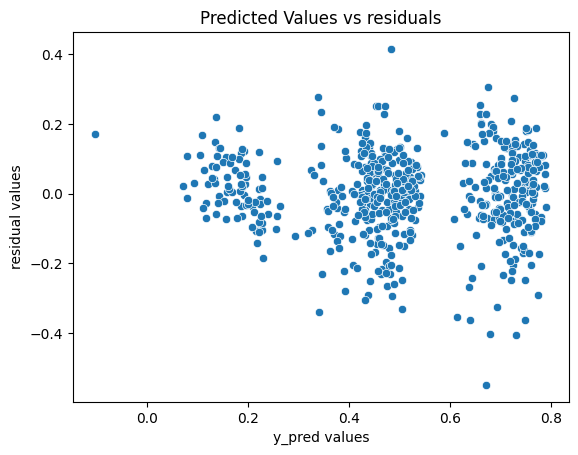

In [160]:
sns.scatterplot(x=y_train_pred,y=res)
plt.title('Predicted Values vs residuals')
plt.xlabel('y_pred values')
plt.ylabel('residual values')
plt.show()

### We see no pattern between the residuals and predicted values. Thus , we can trust the model

In [ ]:
# transform test data

df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [150]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,...,0.054795,0.089041,0.034247,0.315068,0.123288,0.116438,0.102740,0.171233,0.178082,0.089041
std,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,...,0.228362,0.285783,0.182488,0.466142,0.329899,0.321854,0.304664,0.378009,0.383899,0.285783
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
y_test = df_test.pop('cnt')
X_test = df_test

In [152]:
# add constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,...,mnth_October,mnth_September,weathersit_light_rain,weathersit_mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,1,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,1,0,0


In [153]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_light_rain', 'weekday_Saturday'],
      dtype='object')

In [154]:
X_test_sm = X_test_sm[X_train_rfe.columns]

In [155]:
# predict

y_test_pred = lm4.predict(X_test_sm)

In [156]:
#evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6942423995766047

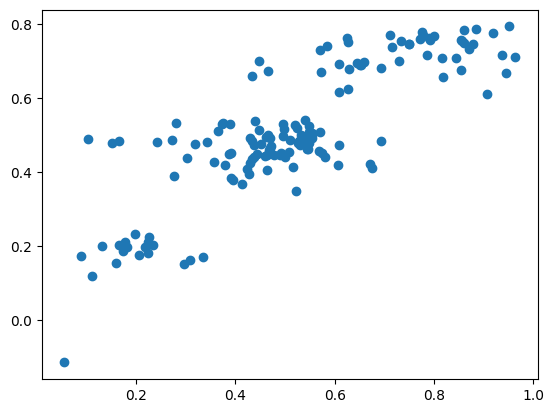

In [157]:
plt.scatter(y_test,y_test_pred)

# Regression equation :  cnt = 0.5009 + 0.2422 * yr  +  0.0576 * workingday - 0.1905 * windspeed - 0.2986 * season_spring - 0.0585 * season_winter - 0.2721 * weathersit_light_rain + 0.0671 * weekday_Saturday

# OBSERVATIONS :

## We can see that demand is more in 2019 , compared to 2018 and we can assume that as covid goes down , the demand is bound to increase again

## among weekdays , saturday seems to have more demand , which company can leverage.

## during more windy days or winter season or spring season , the demand tends to go down.



_____________________________________________________________________________________________________________________________________________________________________________________________________